# Matplotlib and Seaborn

In [1]:
import pandas as pd
import seaborn as sns

# Searborn

## (1) Customer profile analysis
A mall has gathered data on their customers through a loyalty program. They have information about age, gender, annual income and spending score. Spending Score is a measure from 0 to 100, created for each customer based on customer behavior and purchasing data.

**(1.1) Import dataset <code>customers.csv</code> and use the column <code>CustomerID</code> as the index. Rename the columns according to the table below.**<br>

|column name| new column name|
|:-:|:-:|
|Gender|gender|
|Age|age|
|Annual Income (k$)|income|
|Spending Score (1-100)|spending_score|

In [2]:
customer_df = pd.read_csv("../dataset/customers.csv", index_col = "CustomerID")
customer_df.columns = ['gender', 'age', 'income', 'spending_score']
customer_df.head(5)

,gender,age,income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


**(1.2) Use two histograms to show the distribution of <code>spending_score</code> for males and females, respectively. Both histograms are in the same plot, but with different colors.**<br>
Setting: bins = 25.

<AxesSubplot:xlabel='spending_score', ylabel='Count'>

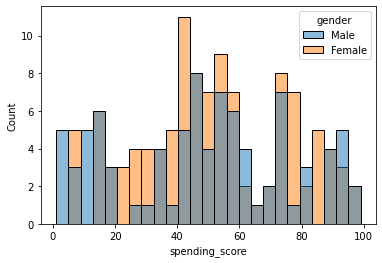

In [3]:
sns.histplot(data = customer_df,  x = "spending_score", hue = "gender", bins = 25)

**(1.3)  Use a scatter plot to show the relationship between <code>income</code> and <code>spending_score</code>. Color points by the column <code>gender</code>.**

<AxesSubplot:xlabel='income', ylabel='spending_score'>

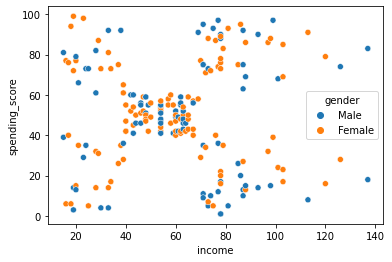

In [4]:
sns.scatterplot(data = customer_df, x ="income", y = "spending_score", hue = "gender")

**(1.4) Use a scatter plot to show the relationship between <code>income</code> and <code>spending_score</code>. Color points by the column <code>age</code>.**<br>
Setting: palette = "cool"

<AxesSubplot:xlabel='income', ylabel='spending_score'>

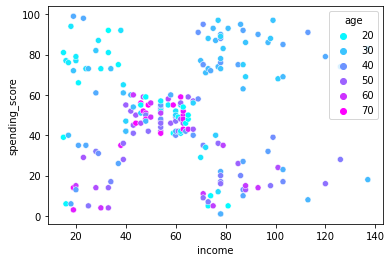

In [5]:
sns.scatterplot(data = customer_df, x ="income", y = "spending_score", hue = "age", palette = "cool")

**(1.5) Use a joint plot to show the relationship between <code>income</code> and <code>spending_score</code>, and their individual distribution.**

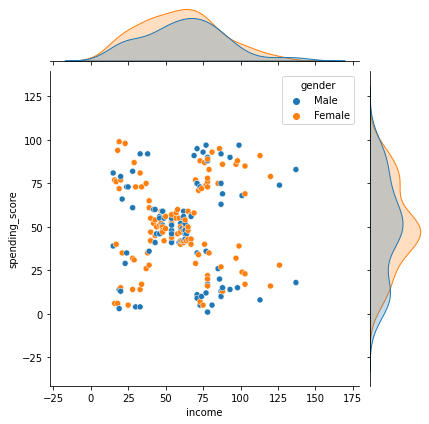

In [6]:
#put your code here
sns.jointplot(data = customer_df, x ="income", y = "spending_score", hue = "gender")

**(1.6) Use pair plot to show the relationship between the following variables: age, income, spending_score.**

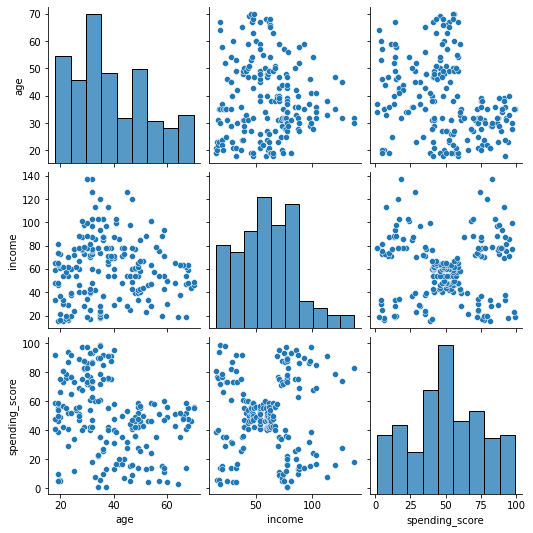

In [7]:
sns.pairplot(data = customer_df.loc[:,["age", "income","spending_score"]])

**(1.7) Use pair plot to show the relationship between the following variables: age, income, spending_score. Color points by the column <code>gender</code>.**

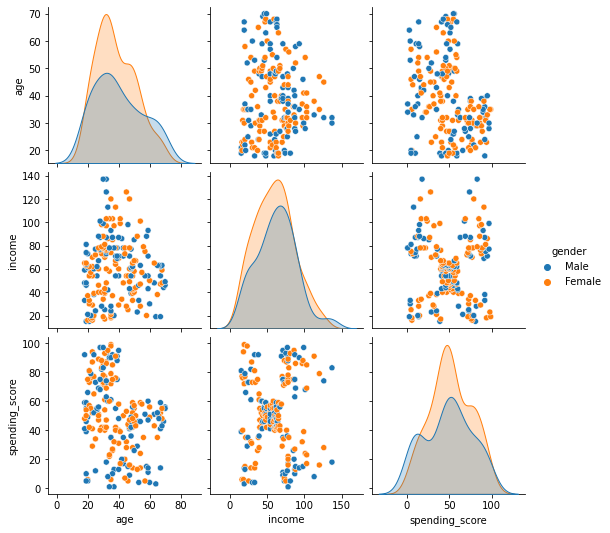

In [8]:
sns.pairplot(data = customer_df.loc[:,["age", "income","spending_score", "gender"]], hue = "gender")

## (2) Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. 
- **class**: Ticket class  (First/Second/Third)
- **who**: sex (man/woman)
- **embarked**: Port of Embarkation 
- **alive**: yes/no

**(2.1) Load the seaborn dataset <code>titanic</code>. Select the following columns and save the subset to a csv file.**<br>
Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html <code>DataFrame.to_csv("filename.csv", index = False)</code>
- class	
- who
- embark_town
- alive

In [9]:
titanic_df = sns.load_dataset("titanic")
titanic_df.loc[:,["class", "who", "embark_town","alive"]].to_csv("titanic.csv", index = False)

**(2.2) Import the dataset you saved in (2.1) and use it to complete the following tasks.** 

In [10]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,class,who,embark_town,alive
0,Third,man,Southampton,no
1,First,woman,Cherbourg,yes
2,Third,woman,Southampton,yes
3,First,woman,Southampton,yes
4,Third,man,Southampton,no


**(2.3) Count the number of passengers in different categories (man/woman/child) according to the column <code>who</code>. Display the result with a count plot.**

<AxesSubplot:xlabel='who', ylabel='count'>

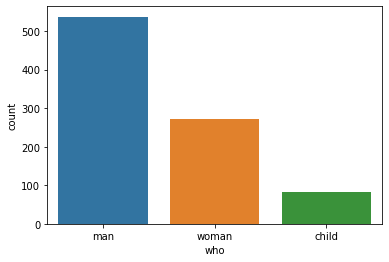

In [11]:
sns.countplot(data = titanic_df, x = "who")

**(2.4) Count the number of passengers in different categories (man/woman/child) according to the column <code>who</code>. Display the result with a count plot and use two bars to display the number of <code>alive</code> (yes/no) passengers in each category. Which category has the lowest survival rate?** 

<AxesSubplot:xlabel='who', ylabel='count'>

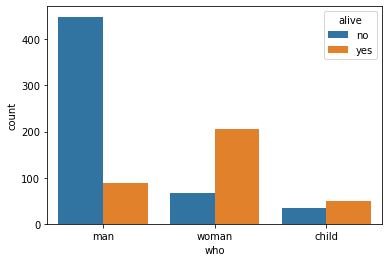

In [12]:
sns.countplot(data = titanic_df, x = "who", hue = "alive")

**Write you answer here:**<br>
Male passengers have the lowest survival rate.

**(2.5) Use a cross table to display the numbers in (2.4).**<br>
Expected result:

|alive<br>who|no|yes|
|:-:|:-:|:-:|
|**child**|34|49|
|**man**|449|88|
|**woman**|66|205|

In [13]:
titanic_ct = pd.crosstab(titanic_df["who"], titanic_df["alive"])
titanic_ct

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


**(2.6) Use a heatmap to display the result in (2.5).**<br>
Setting: <code>cmap = "GnBu"</code>

<AxesSubplot:xlabel='alive', ylabel='who'>

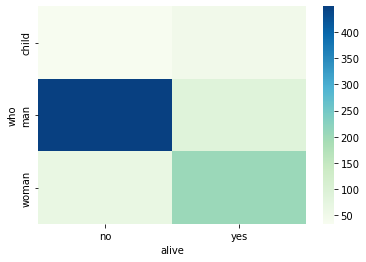

In [14]:
sns.heatmap(data = titanic_ct, cmap = "GnBu")

**(2.7) Use three subplots to compare the survival of passengers in the following three categories: class = First, Class = Second, class = Third. In each subplot, draw two bars, each representing the number of surviving and non-surviving passengers.**<br>
Hint: <code>col = "class"</code>

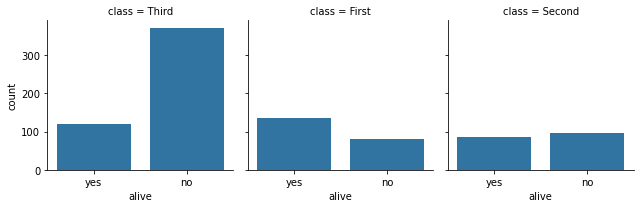

In [15]:
g = sns.FacetGrid(data = titanic_df, col = "class")
g.map(sns.countplot, "alive", order = ["yes","no"])

## (3) Diamond

**(3.1) Load the seaborn dataset <code>diamonds</code>. Show the name and data type of each column.** 

In [16]:
diamond_df = sns.load_dataset("diamonds")
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


**(3.2) Use countplot to display the number of diamonds in each <code>color</code> category**.

<AxesSubplot:xlabel='color', ylabel='count'>

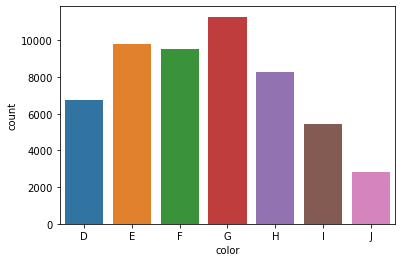

In [17]:
sns.countplot(data = diamond_df, x = "color")

**(3.3) Calculate the average price for each <code>cut</code> category within each <code>clarity</code> category. Round the numbers to two decimal places.**<br>
Expected result:

||IF|VVS1|...|...|I1|
|--:|--:|--:|--:|--:|--:|
|**Ideal**|2272.91|...|...|...|...|
|**Premium**|...|...|...|...|...|
|**Very Good**|...|...|...|...|...|
|**Good**|...|...|...|...|...|
|**Fair**|...|...|...|...|...|

In [18]:
avg_price = diamond_df.pivot_table(index = "cut", columns = "clarity", values = "price", aggfunc = "mean").round(2)
avg_price

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2272.91,2468.13,3250.29,3489.74,3284.55,3752.12,4755.95,4335.73
Premium,3856.14,2831.21,3795.12,4485.46,4550.33,4455.27,5545.94,3947.33
Very Good,4396.22,2459.44,3037.77,3805.35,4215.76,3932.39,4988.69,4078.23
Good,4098.32,2254.77,3079.11,3801.45,4262.24,3689.53,4580.26,3596.64
Fair,1912.33,3871.35,3349.77,4165.14,4174.72,4208.28,5173.92,3703.53


**(3.4) Use a heatmap to display the result obtained in (3.3).**

<AxesSubplot:xlabel='clarity', ylabel='cut'>

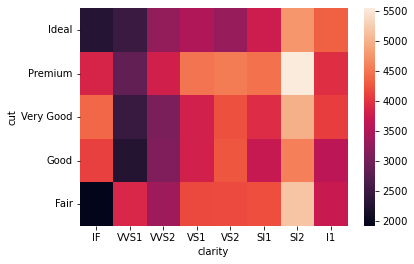

In [19]:
sns.heatmap(avg_price)

**(3.5) Shows the relationship between <code>carat</code> and <code>price</code> for each <code>cut</code> category.**<br>
Hint: The figure should contain 5 subplots.

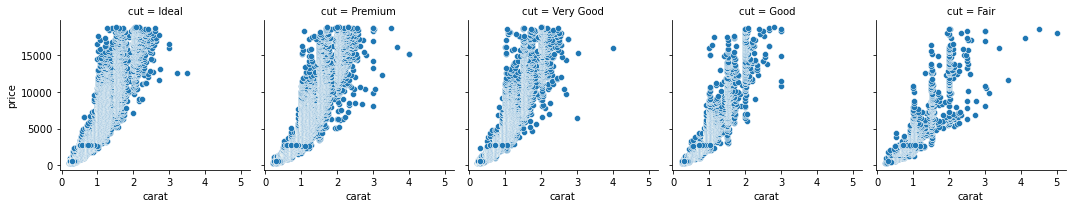

In [20]:
g = sns.FacetGrid(diamond_df, col = "cut")
g.map(sns.scatterplot, "carat", "price")